In [235]:
import cv2 as cv
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [236]:
im_in_actual = cv.imread("C:\\Users\\grdmg\\Desktop\\StCC_Scripts\\M24C12V25T37P450\\image_4000.tif")
frame_rate = 4000

here it creates the "original" image, this is the light colored image

In [237]:
new_image = np.zeros(im_in_actual.shape, im_in_actual.dtype)
alpha = 2.5  # Simple contrast control
beta = 10  # Simple brightness control
for y in range(im_in_actual.shape[0]):
    for x in range(im_in_actual.shape[1]):
        for c in range(im_in_actual.shape[2]):
            new_image[y, x, c] = np.clip(alpha * im_in_actual[y, x, c] + beta, 0, 255)
new_image = cv.medianBlur(new_image, 3)
new_image = cv.medianBlur(new_image, 5)
new_image = cv.medianBlur(new_image, 3)
im_in_original = new_image
cv.imwrite(f"L_image_{frame_rate}.tif", im_in_original)

True

In [239]:
h, w = im_in_original.shape[:2]
white = np.zeros([h + 300, w + 300, 3], dtype=np.uint8)
white.fill(255)
for i in range(1, h, 1):
    for j in range(1, w, 1):
        white[i + 150, j + 150] = im_in_original[i, j]
framed_image = white
framed_image = cv.cvtColor(framed_image, cv.COLOR_BGR2GRAY)


white2 = np.zeros([h + 300, w + 300, 3], dtype=np.uint8)
white2.fill(255)
for i in range(1, h, 1):
    for j in range(1, w, 1):
        white2[i + 150, j + 150] = im_in_actual[i, j]
framed_image_actual = white2
framed_image_actual = cv.cvtColor(framed_image_actual, cv.COLOR_BGR2GRAY)

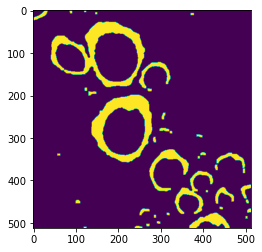

In [291]:
th, im_th = cv.threshold(im_in_original, 200, 100, cv.THRESH_BINARY_INV);
#cv.imwrite(f"original_{frame_rate}.tif", im_in_original)
#cv.imwrite(f"THRes_{frame_rate}.tif", im_th)

kernel = np.ones((3, 3), np.uint8)

erosion3 = cv.erode(im_th, kernel, iterations=2)
dilation3 = cv.dilate(erosion3, kernel, iterations=2)
erosion2 = cv.erode(dilation3, kernel, iterations=1)
dilation2 = cv.dilate(erosion2, kernel, iterations=1)
erosion = cv.erode(dilation2, kernel, iterations=1)
dilation = cv.dilate(erosion, kernel, iterations=1)
#cv.imwrite(f"dilation_{frame_rate}.tif", dilation)

dilation = cv.cvtColor(dilation, cv.COLOR_BGR2GRAY)


edges = cv.Canny(dilation, 10, 50, apertureSize=3)
#cv.imwrite(f"cannyANDdilation_{frame_rate}.tif", edges)

plt.imshow(dilation)
plt.show()

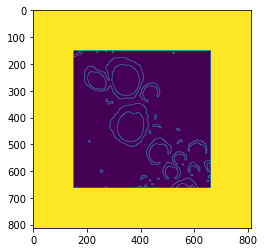

In [278]:
h3, w3 = im_in_original.shape[:2]
white3 = np.zeros([h3 + 300, w3 + 300, 3], dtype=np.uint8)
white3.fill(255)
for i in range(1, h3, 1):
    for j in range(1, w3, 1):
        white3[i + 150, j + 150] = edges[i, j]
framed_image_edges = white3
framed_image_edges = cv.cvtColor(framed_image_edges, cv.COLOR_BGR2GRAY)
plt.imshow(framed_image_edges)
plt.show()

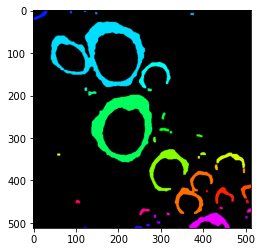

In [269]:
def CC(img):
    nlabels, labels, stats, centroids = cv.connectedComponentsWithStats(img)
    label_hue = np.uint8(179 * labels / np.max(labels))
    blank_ch = 255 * np.ones_like(label_hue)
    labeled_img = cv.merge([label_hue, blank_ch, blank_ch])
    labeled_img = cv.cvtColor(labeled_img, cv.COLOR_HSV2BGR)
    labeled_img[label_hue == 0] = 0
    return labeled_img, nlabels, labels, stats, centroids

components, nlabels, labels, stats, centroids = CC(dilation)

plt.imshow(components)
plt.show()
#cv.imwrite(f"CC_dilation_{frame_rate}.tif", components)
#stats


In [265]:
final_stats = []
final_centroids = []
f_stat_counter = 0
for i in range(stats.shape[0]):
    if (stats[i][0] < 5) or (stats[i][1] < 5) or (stats[i][0] > 500) or (stats[i][2] < 40):
        pass
    else:
        final_stats.append(stats[i])
        final_centroids.append(centroids[i])

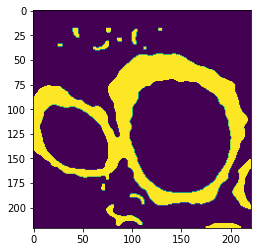

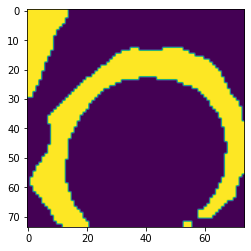

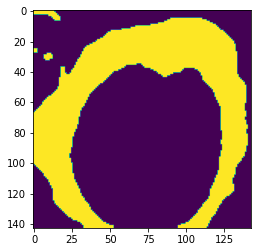

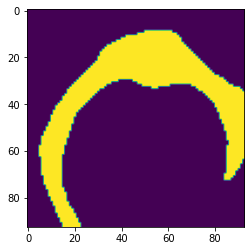

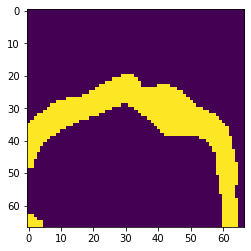

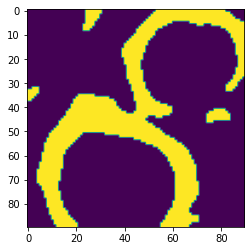

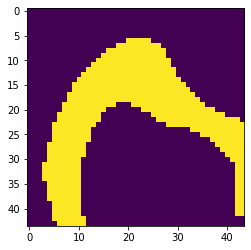

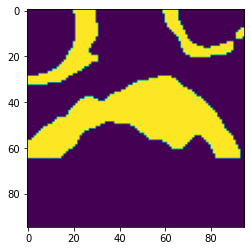

In [304]:
for i in range(len(final_stats)):
    crop_img = framed_image[
                   int(final_centroids[i][1] - ((final_stats[i][2])/2) + 150):int(
                       final_centroids[i][1] + ((final_stats[i][2])/2) + 150), int(final_centroids[i][0] - ((final_stats[i][2])/2) + 150):int(
                       final_centroids[i][0] + ((final_stats[i][2])/2) + 150)]
    #plt.imshow(crop_img)
    #plt.show()
    th, crop_im_th = cv.threshold(crop_img, 200, 100, cv.THRESH_BINARY_INV)
    #plt.imshow(crop_im_th)
    #plt.show()
    kernel = np.ones((3, 3), np.uint8)
    erosion4 = cv.erode(crop_im_th, kernel, iterations=1)
    dilation4 = cv.dilate(erosion4, kernel, iterations=1)
    plt.imshow(dilation4)
    plt.show()
    #componentsSMALL, nlabelsSMALL, labelsSMALL, statsSMALL, centroidsSMALL = CC(crop_img)
    #print(statsSMALL)
    #print("----")



In [ ]:
    cimg = cv.cvtColor(crop_img, cv.COLOR_GRAY2BGR)
    circles = cv.HoughCircles(crop_img, cv.HOUGH_GRADIENT, 1, 100, param1=50, param2=10, minRadius=10, maxRadius=0)
    print(circles.shape)
    print(circles[0][0][1])
    #cv.circle(cimg, (cir, corr_Y), corr_R, (0, 255, 0), 2)  # big corrected circle
    #    # cv.circle(white3, (corr_X, corr_Y), 2, (0, 0, 255), 3)  # corrected circle center
    #plt.imshow(crop_img)
    #plt.show()